In [2]:
import pandas as pd
import numpy as np
import os

### 데이터 기본 전처리

In [69]:
# GDP 전처리
gdp = pd.read_csv("./datasets/data/국내총생산.csv").transpose()
gdp = gdp.iloc[4:].rename(columns={0:"GDP"})
gdp.to_csv("./datasets/data_after/GDP.csv", encoding="CP949")
gdp = pd.read_csv("./datasets/data_after/GDP.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# 소비자물가지수 전처리
sobija = pd.read_csv("./datasets/data/소비자물가지수.csv").transpose()
sobija = sobija.iloc[5:].rename(columns={0:"소비자물가지수"})
sobija.to_csv("./datasets/data_after/소비자물가지수.csv", encoding="CP949")
sobija = pd.read_csv("./datasets/data_after/소비자물가지수.csv", encoding="CP949")
sobija = sobija.rename(columns={'Unnamed: 0':'index'})
sobija['index'] = pd.to_datetime(sobija['index'], format="%Y/%m").dt.strftime("%Y-%m")
# ----------------------------------------------------------------------------

# 주택종합 매매가격지수 전처리
meme = pd.read_excel("./datasets/data/주택종합 매매가격지수_20220808.xlsx")
meme = meme[0:1].transpose().reset_index().drop(index=0)
meme['index'] = pd.to_datetime(meme['index'], format="%Y-%m-%d %HH:%M:%S").dt.strftime("%Y-%m")
meme.rename(columns={0:"주택종합 매매가격지수"}).reset_index(drop=True).to_csv("./datasets/data_after/주택종합_매매가격지수_전처리.csv",encoding='CP949')
meme = pd.read_csv("./datasets/data_after/주택종합_매매가격지수_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# 주택종합 전세가격지수 전처리
junsae = pd.read_excel("./datasets/data/주택종합 전세가격지수_20220808.xlsx")
junsae = junsae[0:1].transpose().reset_index().drop(index=0)
junsae['index'] = pd.to_datetime(junsae['index'], format="%Y-%m-%d %HH:%M:%S").dt.strftime("%Y-%m")
junsae.rename(columns={0:"주택종합 전세가격지수"}).reset_index(drop=True).to_csv("./datasets/data_after/주택종합_전세가격지수_전처리.csv",encoding='CP949')
junsae = pd.read_csv("./datasets/data_after/주택종합_전세가격지수_전처리.csv", encoding="CP949")
# ----------------------------------------------------------------------------

# # 실업자 전처리
# unemploy = pd.read_csv("../raw_data/연령별_경제활동인구_총괄_20220808152350(월별).csv", encoding='CP949').transpose()
# unemploy = pd.DataFrame()
# unemploy_real = []

# # 반복문으로 실업자만 골라서 리스트에 저장
# for i in range(len(job)):
#     if(i*8-4 == len(job)+3): break
#     if(i==0): continue

#     unemploy = job.iloc[i*8-4]
#     unemploy.append(unemploy)

# # 불필요한 컬럼을 삭제하고, 컬럼의 이름을 바꿔서 내보내봅시다
# unemploy = pd.DataFrame(unemploy).drop(columns=[0]).rename(columns={1:"15세 이상", 2:"15-19", 3:"20-29", 4:"30-39", 5:"40-49", 6:"50-59", 7:"60세 이상", 8:"15-64", 9:"15-24", 10:"15-29"})

# # 실업자로 구하고 싶으면 i*8-4, len(job)+3 으로 변경
# # 실업률로 구하고 싶으면 i*8-1, len(job)+6 으로 변경
# # iloc로 필요한 성분을 조회해서 그 때 그 때 위치에 맞춰서 조정하면 다른 데이터도 뽑을 수 있음

# unemploy = unemploy.reset_index()
# unemploy['index'] = pd.to_datetime(unemploy['index'], format="%Y.%m.").dt.strftime("%Y-%m")
# unemploy.set_index('index').to_csv("../전처리/실업자_전처리(천명).csv", encoding="CP949")
unemploy = pd.read_csv("./datasets/data_after/실업자_전처리(단위_천명).csv", encoding="CP949")

# 실업자수 15세 이상 & 15-64만 추출
unemploy = unemploy.rename(columns={'15세 이상':'15세 이상 실업자 수', '15-64':'15-64 실업자 수'})
unemploy = unemploy[['index','15세 이상 실업자 수','15-64 실업자 수']]
unemploy
# ----------------------------------------------------------------------------

# MBS조기상환율 전처리
mbs1 = pd.read_csv("./datasets/data/K-MBS_200406-200412.csv", header=None)
mbs2 = pd.read_csv("./datasets/data/K-MBS_200501-201012.csv", header=None)
mbs3 = pd.read_csv("./datasets/data/K-MBS_201101-201512.csv", header=None)
mbs4 = pd.read_csv("./datasets/data/K-MBS_201601-202012.csv", header=None)
mbs5 = pd.read_csv("./datasets/data/K-MBS_202101-202208.csv", header=None)

mbs1 = mbs1[[0,1,2,8]]
mbs2 = mbs2[[0,1,2,8]]
mbs3 = mbs3[[0,1,2,8]]
mbs4 = mbs4[[0,1,2,8]]
mbs5 = mbs5[[0,1,2,8]]

mbs = pd.concat([mbs1, mbs2, mbs3, mbs4, mbs5], ignore_index=True).dropna()
mbs = mbs.loc[mbs[0].str.contains('MBS', na = False),:]
mbs = mbs.rename(columns={0:'발행회차', 1:'발행일자', 2:'기준월', 8:'만기전상환율'})
mbs['발행일자'] = pd.to_datetime(mbs['발행일자'], format="%Y-%m-%d").dt.strftime("%Y-%m-%d")
mbs['기준월'] = pd.to_datetime(mbs['기준월'], format="%Y-%m").dt.strftime("%Y-%m")
mbs = mbs.sort_values(['발행회차','기준월'], ascending=True).reset_index(drop=True)
mbs.to_csv("./datasets/data_after/mbs_test.csv", encoding='CP949')
# ----------------------------------------------------------------------------

# MBS 발행금리 전처리
mbs_gum = pd.read_csv("./datasets/data_after/MBS발행금리_20040101-20220810.csv", encoding="UTF8", header=None)
mbs_gum = mbs_gum[1:].copy()
mbs_gum.drop(columns=[3,4,5,6,7,8], inplace=True)
mbs_gum = mbs_gum.rename(columns={0:'발행회차', 1:'발행일자', 2:'가중평균발행금리'})
mbs_gum['발행일자'] = pd.to_datetime(mbs_gum['발행일자'], format="%Y-%m-%d").dt.strftime("%Y-%m-%d")
mbs_gum = mbs_gum.sort_values(['발행회차'], ascending=True).reset_index(drop=True)
mbs_gum.to_csv("./datasets/data_after/mbs_금리_최종.csv", encoding='CP949')
# ----------------------------------------------------------------------------

# 예금은행 대출금리 전처리
banking = pd.read_csv("./datasets/data_after/예금은행 대출금리(신규취급액 기준)_200401-202206.csv")
banking['변환'] = pd.to_datetime(banking['변환'], format="%Y/%m").dt.strftime("%Y-%m")
# ----------------------------------------------------------------------------

# kospi 전처리
import FinanceDataReader as fdr
kospi_d = fdr.DataReader('KS11', '2004-01-01', '2022-07-31')
kospi_m = kospi_d.resample('M').last().reset_index()
kospi_m['Date'] = pd.to_datetime(kospi_m['Date'], format="%Y-%m-%d").dt.strftime("%Y-%m")
kopsi = kospi_m[['Date','Close']]

### 데이터프레임을 만들기 위한 전처리

In [70]:
# MBS 발행금리와 MBS데이터 합치기
mbs_real = pd.merge(mbs, mbs_gum, on='발행회차', how='outer')
mbs_real.drop(columns=['발행일자_x'], inplace=True)
mbs_real = mbs_real.sort_values(['발행회차', '기준월'], ascending=True).reset_index(drop=True).dropna()
mbs_real.to_csv("./datasets/data_after/mbs_merge_real.csv", encoding='CP949')
mbs_real
# # ----------------------------------------------------------------------------

# 주택지수끼리 합치기
house = pd.merge(meme, junsae, on='index', how='outer')
house.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
# ----------------------------------------------------------------------------

# complete에 주택 지수랑 소비자 지수 합치기
complete = pd.merge(house, sobija, on='index', how='outer')

# complete에 실업자수 합치기
complete = pd.merge(complete, unemploy, on='index', how='outer')

# complete로 담아놨던 것들에서 결측치 제거
complete = complete.dropna().copy()
complete
# ----------------------------------------------------------------------------

# test에 complete와 MBS 발행금리와 MBS데이터 합치기
test = pd.merge(complete, mbs_real, left_on='index', right_on='기준월')

# test에 MBS kospi 합치기
test = pd.merge(test, kopsi, left_on='기준월', right_on='Date')

# test에 예금금리 합치기
test = pd.merge(test, banking, left_on='기준월', right_on='변환')
# ----------------------------------------------------------------------------

# 전처리 최종작업
test.drop(columns=['index', '15세 이상 실업자 수', 'Date'], inplace=True)
test = test.rename(columns={'Close':'코스피 월별 종가'})
test.drop(columns=['변환'], inplace=True)
test = test[['발행회차', '발행일자_y', '기준월', '만기전상환율', '가중평균발행금리', '주택종합 매매가격지수', '주택종합 전세가격지수',
'소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '원자료']]
test = test.rename(columns={'원자료':'예금은행 대출금리', '발행일자_y':'발행일자'})
test.to_csv("./datasets/data_after/전처리_최종.csv", encoding='CP949')
# ----------------------------------------------------------------------------


# 의성오빠_본격분석

In [80]:
# 예금은행 대출금리 - 가중평균발행금리 구하기
data = pd.read_csv("./datasets/data_after/전처리_최종.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)
data['금리차'] = data['예금은행 대출금리'] - data['가중평균발행금리']
data.head()
test2 = data.groupby(['발행회차','발행일자','기준월']).sum()
test2.to_csv("./datasets/data_after/mbs_groupby.csv", encoding="CP949")
test3 = pd.read_csv("./datasets/data_after/mbs_groupby.csv", encoding="CP949")
test3.head()

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.51,5.04,52.743,51.435,72.119,794.0,785.79,5.99,0.95
1,MBS 2004-01,2004-06-15,2004-07,0.36,5.04,52.603,51.040,72.561,858.0,735.34,5.93,0.89
2,MBS 2004-01,2004-06-15,2004-08,0.42,5.04,52.394,50.554,73.191,842.0,803.57,5.80,0.76
3,MBS 2004-01,2004-06-15,2004-09,0.29,5.04,52.283,50.314,73.191,784.0,835.09,5.63,0.59
4,MBS 2004-01,2004-06-15,2004-10,0.42,5.04,52.157,50.090,73.191,801.0,834.84,5.57,0.53


### 기초통계량 분석

In [ ]:
# # 데이터프레임의 정보
# test3.info()
# # 결측치 확인
# test3.isna().sum()

In [75]:
# 기초 통계 조회
test3.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
count,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000,34717.000000
mean,2.139585,3.158165,79.714278,84.159783,97.342261,919.957370,2256.168735,3.382053,0.223889
std,2.434816,1.686062,10.013927,10.472289,5.671699,133.817237,428.147488,0.874111,1.640746
min,0.000000,0.000000,51.567000,49.086000,72.119000,684.000000,735.340000,2.390000,-4.250000
25%,0.760000,2.170000,72.809000,80.703000,94.625000,817.000000,1987.010000,2.740000,-0.800000
50%,1.500000,3.160000,78.049000,85.623000,98.779000,908.000000,2108.330000,3.220000,0.170000
75%,2.730000,4.450000,83.137000,87.207000,100.180000,1021.000000,2467.490000,3.730000,1.040000
max,96.181300,6.640000,100.869000,100.912000,108.220000,1186.000000,3296.680000,7.580000,5.900000


In [81]:
# 아주 간단하게 상관관계 분석
test3.corr().head()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
만기전상환율,1.000000,0.194170,-0.254380,-0.172973,-0.201059,-0.037547,-0.210616,-0.031371,-0.216246
가중평균발행금리,0.194170,1.000000,-0.283776,-0.342710,-0.340988,-0.105400,-0.241836,0.310362,-0.862273
주택종합 매매가격지수,-0.254380,-0.283776,1.000000,0.922019,0.904084,-0.039206,0.828114,-0.422340,0.066611
주택종합 전세가격지수,-0.172973,-0.342710,0.922019,1.000000,0.969679,0.117448,0.783681,-0.669706,-0.004612
소비자물가지수,-0.201059,-0.340988,0.904084,0.969679,1.000000,0.146952,0.735953,-0.667232,-0.005063


# 여기부터 다시 시작

### 상관관계 히트맵으로 시각화

c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


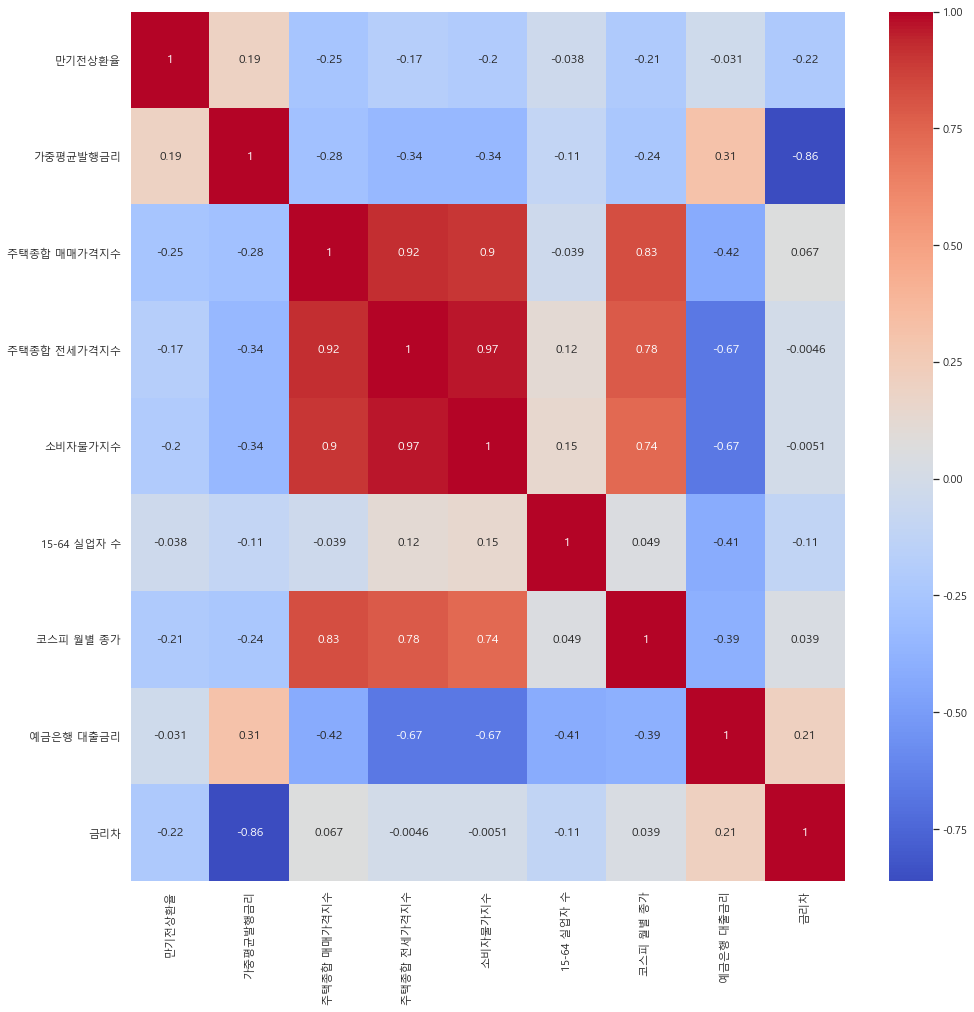

In [77]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(test3.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

### 현재 상관관계가 굉장히 높은 것들 (> |0.7|)
1. 가중평균발행금리 & 금리의 차이
2. 주택종합 매매가격지수 & 주택종합 전세가격지수
3. 소비자 물가지수 & 주택종합 매매가격지수
4. 소비자 물가지수 & 주택종합 전세가격지수
5. 코스피 월별종가 & 주택종합 매매가격지수
6. 코스피 월별종가 & 주택종합 전세가격지수

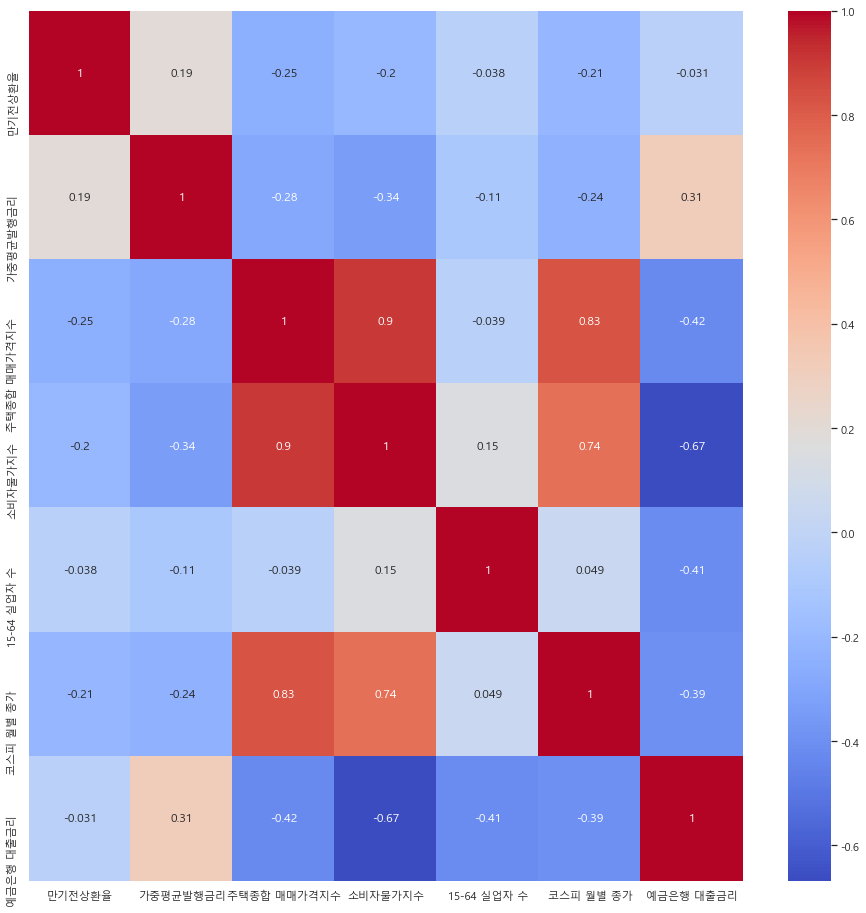

In [78]:
# 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정
test4 = test3.copy()
test4.drop(columns=['금리차','주택종합 전세가격지수'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(test4.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

#### if Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같습니다 (못 써요)
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


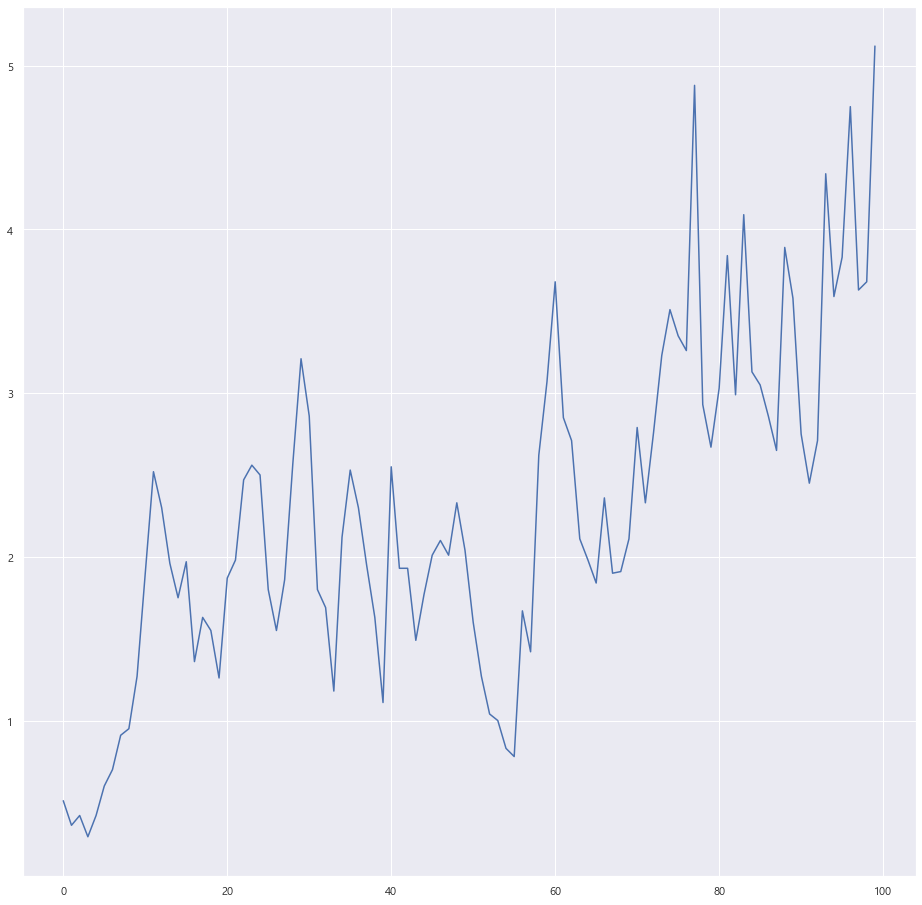

In [79]:
test3

x = test3.index[:100]
y = test3['만기전상환율'][:100]

print(x.values)
plt.plot(x, y.values)
plt.show()

In [83]:
# 주택 지수들은 lag (t-1) : 한 칸씩 내려요
# GDP : 보류 (만약 처리한다면 로그 차분)
# 소비자물가지수(CPI) : lag(t-1) --> 한 칸씩 내려요
# 실업자수 : 로그 차분
# 주가지수 : lag(t-1) --> 한 칸씩 내려요
# 대출금리 : lag(t-1) --> 한 칸씩 내려요
test5 = test3.copy()
test5.head()

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.51,5.04,52.743,51.435,72.119,794.0,785.79,5.99,0.95
1,MBS 2004-01,2004-06-15,2004-07,0.36,5.04,52.603,51.040,72.561,858.0,735.34,5.93,0.89
2,MBS 2004-01,2004-06-15,2004-08,0.42,5.04,52.394,50.554,73.191,842.0,803.57,5.80,0.76
3,MBS 2004-01,2004-06-15,2004-09,0.29,5.04,52.283,50.314,73.191,784.0,835.09,5.63,0.59
4,MBS 2004-01,2004-06-15,2004-10,0.42,5.04,52.157,50.090,73.191,801.0,834.84,5.57,0.53


In [85]:
test5["주택종합 매매가격지수"] = test5["주택종합 매매가격지수"].shift(1)
test5["주택종합 전세가격지수"] = test5["주택종합 전세가격지수"].shift(1)
test5["가중평균발행금리"] = test5["가중평균발행금리"].shift(1)
test5["예금은행 대출금리"] = test5["예금은행 대출금리"].shift(1)
test5["금리차"] = test5["금리차"].shift(1)
test5["소비자물가지수"] = test5["소비자물가지수"].shift(1)
test5["코스피 월별 종가"] = test5["코스피 월별 종가"].shift(1)
np.log(test5['15-64 실업자 수'])

# lag 등을 고려하지 않고 현재 데이터에서 그냥 회귀분석
test6 = test3.copy()
test6.head()

,발행회차,발행일자,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,금리차
0,MBS 2004-01,2004-06-15,2004-06,0.51,5.04,52.743,51.435,72.119,794.0,785.79,5.99,0.95
1,MBS 2004-01,2004-06-15,2004-07,0.36,5.04,52.603,51.040,72.561,858.0,735.34,5.93,0.89
2,MBS 2004-01,2004-06-15,2004-08,0.42,5.04,52.394,50.554,73.191,842.0,803.57,5.80,0.76
3,MBS 2004-01,2004-06-15,2004-09,0.29,5.04,52.283,50.314,73.191,784.0,835.09,5.63,0.59
4,MBS 2004-01,2004-06-15,2004-10,0.42,5.04,52.157,50.090,73.191,801.0,834.84,5.57,0.53


In [86]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

data = test6[['가중평균발행금리', '주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '예금은행 대출금리']]
#data = test6[['주택종합 매매가격지수', '소비자물가지수', '15-64 실업자 수', '코스피 월별 종가', '금리차']]
target = test6['만기전상환율']


ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1)

# cross_val_score ==> default = 5-fold
rid_mse_score = cross_val_score(ridge, data, target, scoring="neg_mean_squared_error")
sso_mse_score = cross_val_score(lasso, data, target, scoring="neg_mean_squared_error")
ela_mse_score = cross_val_score(elastic, data, target, scoring="neg_mean_squared_error")

rid_rmse_score = np.sqrt(-1 * rid_mse_score)
sso_rmse_score = np.sqrt(-1 * sso_mse_score)
ela_rmse_score = np.sqrt(-1 * ela_mse_score)

rid_avg_rmse = np.mean(rid_rmse_score)
sso_avg_rmse = np.mean(sso_rmse_score)
ela_avg_rmse = np.mean(ela_rmse_score)

print(f'Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
print(f'Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
print(f'Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

print(f'Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
print(f'Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
print(f'Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

print(f'Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
print(f'Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
print(f'Elastic AVG RMSE : {ela_avg_rmse:.3f}')

Ridge Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
Ridge RMSE scores : [3.195 3.453 2.279 1.268 1.091]
Ridge AVG RMSE : 2.257

Lasso Negative MSE score : [ -8.987 -12.11   -5.27   -1.571  -1.125]
Lasso RMSE scores : [2.998 3.48  2.296 1.253 1.06 ]
Lasso AVG RMSE : 2.217

Elastic Negative MSE score : [ -9.526 -12.053  -5.275  -1.582  -1.118]
Elastic RMSE scores : [3.086 3.472 2.297 1.258 1.057]
Elastic AVG RMSE : 2.234


In [87]:
# 알파는 과연 얼마나 주는 것이 바람직한가
# alpha 0.1 확정

import warnings
warnings.filterwarnings('ignore')

alphas = [0, 0.1, 0.01, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic = ElasticNet(alpha=alpha)

    rid_mse_score = cross_val_score(ridge, data, target, scoring="neg_mean_squared_error")
    sso_mse_score = cross_val_score(lasso, data, target, scoring="neg_mean_squared_error")
    ela_mse_score = cross_val_score(elastic, data, target, scoring="neg_mean_squared_error")

    rid_rmse_score = np.sqrt(-1 * rid_mse_score)
    sso_rmse_score = np.sqrt(-1 * sso_mse_score)
    ela_rmse_score = np.sqrt(-1 * ela_mse_score)

    rid_avg_rmse = np.mean(rid_rmse_score)
    sso_avg_rmse = np.mean(sso_rmse_score)
    ela_avg_rmse = np.mean(ela_rmse_score)

    print(f'alpha {alpha} Ridge Negative MSE score : {np.round(rid_mse_score, 3)}')
    print(f'alpha {alpha} Ridge RMSE scores : {np.round(rid_rmse_score, 3)}')
    print(f'alpha {alpha} Ridge AVG RMSE : {rid_avg_rmse:.3f}\n')

    print(f'alpha {alpha} Lasso Negative MSE score : {np.round(sso_mse_score, 3)}')
    print(f'alpha {alpha} Lasso RMSE scores : {np.round(sso_rmse_score, 3)}')
    print(f'alpha {alpha} Lasso AVG RMSE : {sso_avg_rmse:.3f}\n')

    print(f'alpha {alpha} Elastic Negative MSE score : {np.round(ela_mse_score, 3)}')
    print(f'alpha {alpha} Elastic RMSE scores : {np.round(ela_rmse_score, 3)}')
    print(f'alpha {alpha} Elastic AVG RMSE : {ela_avg_rmse:.3f}\n')

alpha 0 Ridge Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0 Ridge RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0 Ridge AVG RMSE : 2.257

alpha 0 Lasso Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0 Lasso RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0 Lasso AVG RMSE : 2.257

alpha 0 Elastic Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0 Elastic RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0 Elastic AVG RMSE : 2.257

alpha 0.1 Ridge Negative MSE score : [-10.208 -11.925  -5.195  -1.607  -1.19 ]
alpha 0.1 Ridge RMSE scores : [3.195 3.453 2.279 1.268 1.091]
alpha 0.1 Ridge AVG RMSE : 2.257

alpha 0.1 Lasso Negative MSE score : [ -8.987 -12.11   -5.27   -1.571  -1.125]
alpha 0.1 Lasso RMSE scores : [2.998 3.48  2.296 1.253 1.06 ]
alpha 0.1 Lasso AVG RMSE : 2.217

alpha 0.1 Elastic Negative MSE score : [ -9.526 -12.053  -5.275  -1.582  -1.118]
alpha 0.1 Elastic RMSE scores : [3.086 3.472 2.297 1.258

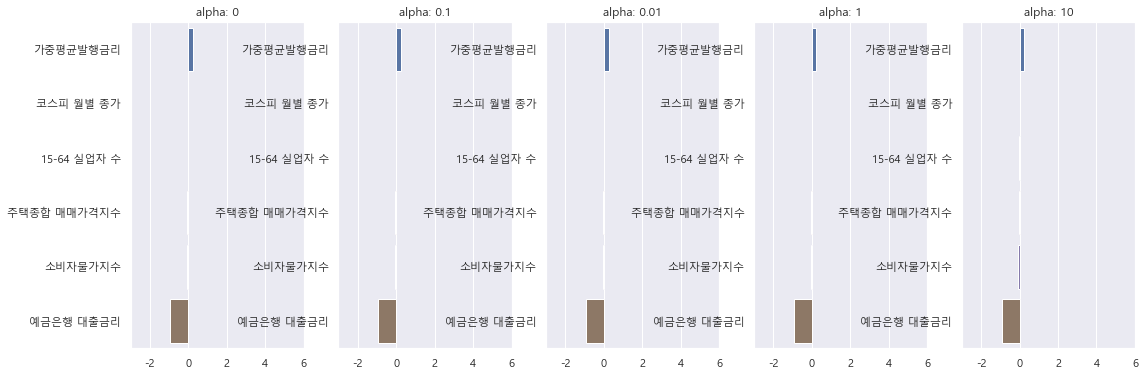

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246184    0.246183     0.246184  0.246178   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002640   -0.002640    -0.002640 -0.002639  -0.002638
주택종합 매매가격지수 -0.052596   -0.052597    -0.052596 -0.052605  -0.052685
소비자물가지수     -0.060319   -0.060316    -0.060318 -0.060296  -0.060096
예금은행 대출금리   -0.930051   -0.930040    -0.930049 -0.929945  -0.929001


In [89]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
ridge_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(ridge_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [90]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246184,0.246183,0.246184,0.246178,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002640,-0.002640,-0.002640,-0.002639,-0.002638
주택종합 매매가격지수,-0.052596,-0.052597,-0.052596,-0.052605,-0.052685
소비자물가지수,-0.060319,-0.060316,-0.060318,-0.060296,-0.060096
예금은행 대출금리,-0.930051,-0.930040,-0.930049,-0.929945,-0.929001


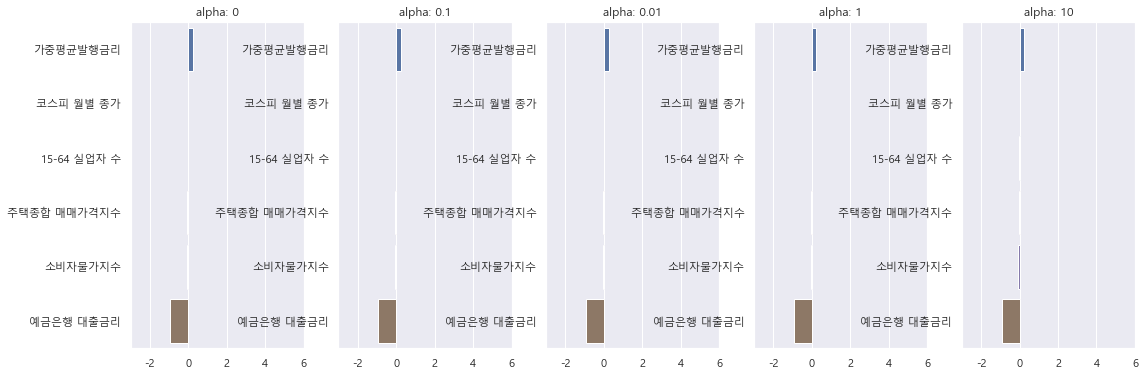

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [91]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
lasso_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(lasso_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [92]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001


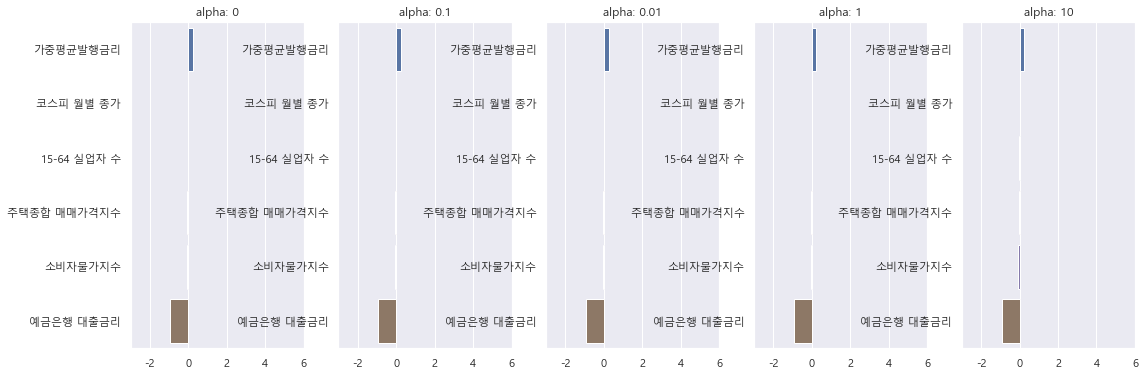

             alpha: 0  alpha: 0.1  alpha: 0.01  alpha: 1  alpha: 10
가중평균발행금리     0.246124    0.246124     0.246124  0.246124   0.246124
코스피 월별 종가   -0.000064   -0.000064    -0.000064 -0.000064  -0.000064
15-64 실업자 수 -0.002638   -0.002638    -0.002638 -0.002638  -0.002638
주택종합 매매가격지수 -0.052685   -0.052685    -0.052685 -0.052685  -0.052685
소비자물가지수     -0.060096   -0.060096    -0.060096 -0.060096  -0.060096
예금은행 대출금리   -0.929001   -0.929001    -0.929001 -0.929001  -0.929001


In [93]:
flg, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() #alpha 회귀 계수 저장용

alphas = [0, 0.1, 0.01, 1, 10]

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(data, target)

    # alpha에 따른 피처별 회귀 변수를 Series로 받고 데이터프레임에 추가
    coeff = pd.Series(data = ridge.coef_, index=data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대그래프에서 회귀계수 높은 순서대로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#
elastic_alpha = [0, 0.1, 0.01, 1, 10]
sort_column = 'alpha: '+str(elastic_alpha[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [94]:
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 0.01,alpha: 1,alpha: 10
가중평균발행금리,0.246124,0.246124,0.246124,0.246124,0.246124
코스피 월별 종가,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064
15-64 실업자 수,-0.002638,-0.002638,-0.002638,-0.002638,-0.002638
주택종합 매매가격지수,-0.052685,-0.052685,-0.052685,-0.052685,-0.052685
소비자물가지수,-0.060096,-0.060096,-0.060096,-0.060096,-0.060096
예금은행 대출금리,-0.929001,-0.929001,-0.929001,-0.929001,-0.929001
